<a href="https://colab.research.google.com/github/Ameesha2214/CO2_Emission_Prediction_S7/blob/main/CO2_Emission_Prediction_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import numpy.random as nr
import sys
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn.model_selection as ms
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import feature_selection as fs


In [4]:
data = pd.read_csv(r'data_cleaned.csv')

In [5]:
random_state_num = 0

In [6]:
print("Shape of the dataset:")
data.shape

Shape of the dataset:


(1700, 18)

In [7]:
print("available columns and their data types:")
data.dtypes

available columns and their data types:


,0
country,object
year,int64
cereal_yield,float64
fdi_perc_gdp,float64
en_per_gdp,float64
en_per_cap,float64
co2_ttl,float64
co2_per_cap,float64
co2_per_gdp,float64
pop_urb_aggl_perc,float64


In [8]:
print("Overview of the first 5 rows:")
data.head()

Overview of the first 5 rows:


,country,year,cereal_yield,fdi_perc_gdp,en_per_gdp,en_per_cap,co2_ttl,co2_per_cap,co2_per_gdp,pop_urb_aggl_perc,prot_area_perc,gdp,gni_per_cap,under_5_mort_rate,pop_growth_perc,pop,urb_pop_growth_perc,urb_pop
0,AGO,1991,417.4,5.449515,179.271884,565.451027,4367.397,0.409949,129.971142,15.290728,12.399822,1.219375e+10,820.0,239.1,3.034866,10653515.0,6.687032,4099472.572
1,AGO,1992,397.0,4.982460,193.632183,550.548264,4418.735,0.401597,141.244823,15.660630,12.399823,5.779394e+09,470.0,235.3,3.226990,11002910.0,6.750459,4385759.926
2,AGO,1993,267.8,5.715529,266.318379,551.688878,5801.194,0.510141,246.261769,16.025739,12.399823,5.285600e+09,310.0,231.1,3.297243,11371750.0,6.700777,4689709.700
3,AGO,1994,298.4,4.195018,260.830190,541.553067,3890.687,0.331321,159.575256,16.065941,12.399824,4.059577e+09,190.0,226.3,3.212170,11742960.0,6.503667,5004849.552
4,AGO,1995,402.2,9.374417,237.623934,528.386164,11012.001,0.909699,409.106543,16.134424,12.399825,5.039535e+09,320.0,221.5,3.037335,12105105.0,6.223936,5326246.200


In [9]:
print("Descriptive statistics:")
data.describe()

Descriptive statistics:


,year,cereal_yield,fdi_perc_gdp,en_per_gdp,en_per_cap,co2_ttl,co2_per_cap,co2_per_gdp,pop_urb_aggl_perc,prot_area_perc,gdp,gni_per_cap,under_5_mort_rate,pop_growth_perc,pop,urb_pop_growth_perc,urb_pop
count,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1.700000e+03,1700.000000,1700.000000,1700.000000,1700.000000,1.700000e+03,1700.000000,1700.000000,1700.000000,1.700000e+03,1700.000000,1.700000e+03
mean,1999.570588,3013.317581,2.948940,249.822736,1968.979736,9.793999e+05,4.676663,482.303784,21.480126,12.201789,1.058568e+12,7898.668664,51.971955,1.451313,3.060142e+08,2.252231,1.347903e+08
std,5.143070,1796.206082,3.949722,186.195019,1959.419972,3.235692e+06,4.906273,392.192230,12.105158,9.116682,3.921323e+12,11592.516937,51.332162,1.129312,9.482329e+08,1.642009,4.145755e+08
min,1991.000000,175.700000,-15.027675,66.335372,116.511476,7.077310e+02,0.029411,45.552592,3.526316,0.000000,9.826326e+08,80.000000,3.200000,-2.397174,1.909812e+06,-2.757210,1.151309e+06
25%,1995.000000,1683.364736,0.834105,136.320490,542.882788,1.462125e+04,0.922769,257.139562,12.383953,5.839844,1.636221e+10,780.000000,10.000000,0.630306,9.973065e+06,0.925308,5.469794e+06
50%,2000.000000,2584.800000,1.993220,197.624918,1089.225939,7.728386e+04,3.093346,368.415567,18.525960,10.293791,9.882942e+10,2150.770301,32.350000,1.519890,2.689207e+07,2.315122,1.423239e+07
75%,2004.000000,3933.400000,3.702149,286.474936,2893.996077,3.708446e+05,7.441195,586.972993,28.988324,16.599298,4.122600e+11,9205.000000,79.925741,2.276853,8.234386e+07,3.364747,4.835246e+07
max,2008.000000,8410.800000,51.373951,1383.380011,12607.839262,3.064936e+07,37.106499,3343.454250,60.505780,53.749825,5.580488e+13,58620.000000,239.100000,11.180657,6.610030e+09,12.829046,3.264974e+09


In [10]:
data = data[data['country']!='ARE']

In [11]:
print("Shape of the dataset after removing the ARE outliers:")
data.shape

Shape of the dataset after removing the ARE outliers:


(1686, 18)

In [12]:
feature_cols = ['cereal_yield','fdi_perc_gdp','gni_per_cap', 'en_per_cap', 'pop_urb_aggl_perc',
                    'prot_area_perc', 'gdp',  'pop_growth_perc', 'urb_pop_growth_perc']
label_col = ['co2_per_cap']

features = np.array(data[feature_cols])
labels =  np.array(data[label_col])

In [13]:
nr.seed(1)
features_train, features_test, labels_train, labels_test = train_test_split(features,
                                                                            labels,
                                                                            test_size=0.7,
                                                                            random_state=random_state_num)

In [14]:
nr.seed(1)
feature_folds = ms.KFold(n_splits=4, shuffle = True, random_state=random_state_num)

rf_selector = RandomForestRegressor(random_state=random_state_num)

# Define an objects for a model for recursive feature elimination with CV
nr.seed(1)
selector = fs.RFECV(estimator = rf_selector, cv = feature_folds, scoring = 'r2', n_jobs=-1)

selector = selector.fit(features_train, np.ravel(labels_train))
selector.support_

print("Feature ranking after RFECV:")
print(selector.ranking_)

# print the important features
ranks_transform = list(np.transpose(selector.ranking_))
chosen_features = [i for i,j in zip(feature_cols,ranks_transform) if j==1]
print("Chosen important features:")
print(chosen_features)

Feature ranking after RFECV:
[4 7 2 1 1 3 6 1 5]
Chosen important features:
['en_per_cap', 'pop_urb_aggl_perc', 'pop_growth_perc']


In [15]:
nr.seed(1)
feature_folds = ms.KFold(n_splits=4, shuffle = True, random_state=random_state_num)

# Define the model
rf_selector = RandomForestRegressor(random_state=random_state_num)

# Define an objects for a model for recursive feature elimination with CV
nr.seed(1)
selector = fs.RFECV(estimator = rf_selector, cv = feature_folds, scoring = 'r2', n_jobs=-1)

selector = selector.fit(features_train, np.ravel(labels_train))
selector.support_

print("Feature ranking after RFECV:")
print(selector.ranking_)

# print the important features
ranks_transform = list(np.transpose(selector.ranking_))
chosen_features = [i for i,j in zip(feature_cols,ranks_transform) if j==1]
print("Chosen important features:")
print(chosen_features)

Feature ranking after RFECV:
[4 7 2 1 1 3 6 1 5]
Chosen important features:
['en_per_cap', 'pop_urb_aggl_perc', 'pop_growth_perc']


In [16]:
features_train_reduced = selector.transform(features_train)
features_test_reduced = selector.transform(features_test)

print("Training subset shape before the recursive feature elimination:")
print(features_train.shape)
print("Training subset array shape after the recursive feature elimination:")
print(features_train_reduced.shape)
print("Test subset array shape after the recursive feature elimination:")
print(features_test_reduced.shape)

Training subset shape before the recursive feature elimination:
(505, 9)
Training subset array shape after the recursive feature elimination:
(505, 3)
Test subset array shape after the recursive feature elimination:
(1181, 3)


In [17]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

min_samples_split = [2, 5, 10]

min_samples_leaf = [1, 2, 4]

# Create the hyperparameter grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [18]:
nr.seed(1)
inside_folds = ms.KFold(n_splits=5, shuffle = True, random_state=random_state_num)

# Define the random forest regressor model object
rf_tuner = RandomForestRegressor(random_state=random_state_num)

# Perform a randomized search on the grid
nr.seed(1)
rf_model = ms.RandomizedSearchCV(estimator=rf_tuner, param_distributions = param_grid,
                                 random_state=random_state_num, refit=True,
                                 cv=inside_folds, scoring = 'r2', return_train_score=True, n_jobs=-1)

In [19]:
rf_model.fit(features_train_reduced, np.ravel(labels_train))

# Print the best parameter value
best_n_estimators = rf_model.best_estimator_.n_estimators
best_max_features = rf_model.best_estimator_.max_features

print("best number of estimators:")
print(best_n_estimators)
print("best max_features:")
print(best_max_features)
print("max_depth:")
print(rf_model.best_estimator_.max_depth)
print("min_samples_split")
print(rf_model.best_estimator_.min_samples_split)
print("min_samples_leaf")
print(rf_model.best_estimator_.min_samples_leaf)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_

best number of estimators:
1600
best max_features:
sqrt
max_depth:
20
min_samples_split
2
min_samples_leaf
1


In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Example of the updated parameter grid
param_grid = {
    'n_estimators': [100, 500, 1000, 1600],
    'max_features': ['sqrt', 'log2', None],  # Removed 'auto'
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf_model = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

rf_model.fit(features_train_reduced, labels_train.ravel())


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 500, 1000, 1600]},
             scoring='r2')

In [22]:
# Print the best parameter values after training
best_n_estimators = rf_model.best_estimator_.n_estimators
best_max_features = rf_model.best_estimator_.max_features

print("Best number of estimators:", best_n_estimators)
print("Best max_features:", best_max_features)
print("Max depth:", rf_model.best_estimator_.max_depth)
print("Min samples split:", rf_model.best_estimator_.min_samples_split)
print("Min samples leaf:", rf_model.best_estimator_.min_samples_leaf)


Best number of estimators: 1000
Best max_features: None
Max depth: 20
Min samples split: 2
Min samples leaf: 1


In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Example of the updated parameter grid
param_grid = {
    'n_estimators': [100, 500, 1000, 1600],
    'max_features': ['sqrt', 'log2'],  # Removed 'auto'
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf_model = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

rf_model.fit(features_train_reduced, labels_train.ravel())

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 500, 1000, 1600]},
             scoring='r2')

In [24]:
best_n_estimators = rf_model.best_estimator_.n_estimators
best_max_features = rf_model.best_estimator_.max_features
best_max_depth = rf_model.best_estimator_.max_depth
best_min_samples_split = rf_model.best_estimator_.min_samples_split
best_min_samples_leaf = rf_model.best_estimator_.min_samples_leaf

print("Best number of estimators:", best_n_estimators)
print("Best max_features:", best_max_features)
print("Max depth:", best_max_depth)
print("Min samples split:", best_min_samples_split)
print("Min samples leaf:", best_min_samples_leaf)

Best number of estimators: 1000
Best max_features: sqrt
Max depth: None
Min samples split: 2
Min samples leaf: 1


In [25]:
rf_best_model = rf_model.best_estimator_

In [26]:
nr.seed(1)
outside_folds = ms.KFold(n_splits=10, shuffle = True, random_state=random_state_num)

# Evaluate the model on the training subset with cross-validation
nr.seed(1)
cv_eval = cross_val_score(rf_best_model, features_train_reduced, labels_train, cv = outside_folds, n_jobs=-1)

print('Mean R2 score of all CV folds = %4.3f' % np.mean(cv_eval))
print('Standard deviation of the R2 score over all folds = %4.3f' % np.std(cv_eval))
print('R2 score for each fold:')

# print the R2 score for each fold
for i, j in enumerate(cv_eval):
    print('Fold %2d    %4.3f' % (i+1, j))

Mean R2 score of all CV folds = 0.954
Standard deviation of the R2 score over all folds = 0.024
R2 score for each fold:
Fold  1    0.964
Fold  2    0.898
Fold  3    0.927
Fold  4    0.970
Fold  5    0.942
Fold  6    0.973
Fold  7    0.968
Fold  8    0.958
Fold  9    0.957
Fold 10    0.981


In [27]:
predictions = rf_best_model.predict(features_test_reduced)

# import the functions for the metrics evaluation
from sklearn.metrics import r2_score, mean_squared_error

# calculate the metrics basing on the predicted and true values for the test subset
r2 = r2_score(y_true=labels_test, y_pred=predictions)
mse = mean_squared_error(y_true=labels_test, y_pred=predictions)
rmse = np.sqrt(mse)

print("R2=")
print(r2)
print("Mean Squared Error: MSE=")
print(mse)
print("Root Mean Squared Error: RMSE=")
print(rmse)

R2=
0.9690960680355455
Mean Squared Error: MSE=
0.6011000485475092
Root Mean Squared Error: RMSE=
0.7753064223566765


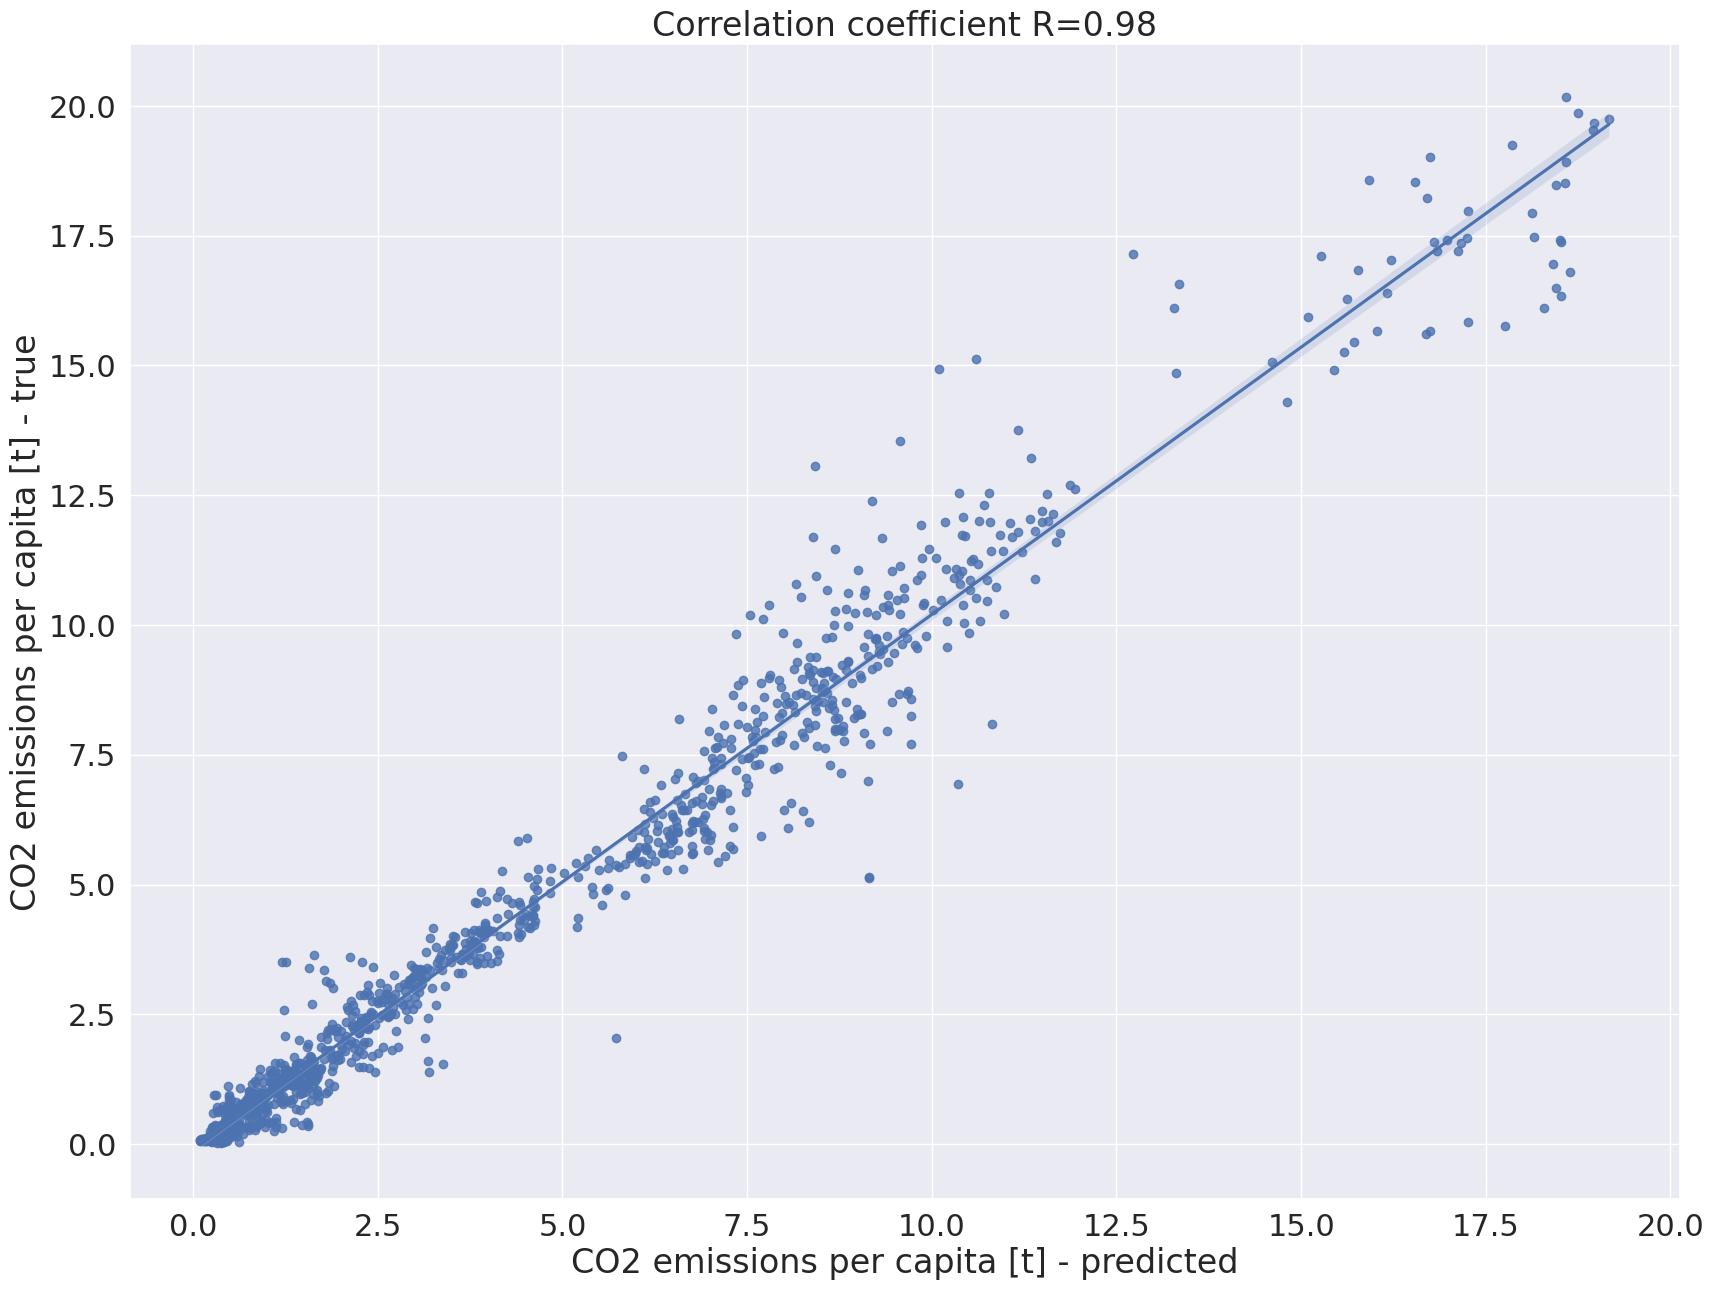

In [31]:
f,ax=plt.subplots(figsize=(20,15))
sns.set(font_scale=2)

sns.regplot(x=predictions, y=np.transpose(labels_test)[0,:], fit_reg=True)
plt.xlabel("CO2 emissions per capita [t] - predicted")
plt.ylabel("CO2 emissions per capita [t] - true")
plt.title("Correlation coefficient R="+str(round(np.corrcoef(predictions,np.transpose(labels_test)[0,:])[0,1],2)))
plt.show()

In [36]:
import numpy as np

# Function to calculate bootstrap confidence intervals
def bootstrap_ci(data, n_iterations=1000, ci=95):
    stats = []
    n_size = len(data)
    for _ in range(n_iterations):
        # Generate bootstrap sample
        sample = np.random.choice(data, size=n_size, replace=True)
        stats.append(np.mean(sample))  # Calculate the mean for each sample
    lower = np.percentile(stats, (100 - ci) / 2)  # Lower bound
    upper = np.percentile(stats, 100 - (100 - ci) / 2)  # Upper bound
    return lower, upper

# Calculate confidence intervals for the predictions
# Define ci here to make it available in the print statement
ci = 95
lower_ci, upper_ci = bootstrap_ci(predictions, ci=ci)

print(f"Bootstrap {ci}% confidence interval for predictions: [{lower_ci}, {upper_ci}]")

Bootstrap 95% confidence interval for predictions: [4.249760382038558, 4.718698078752202]


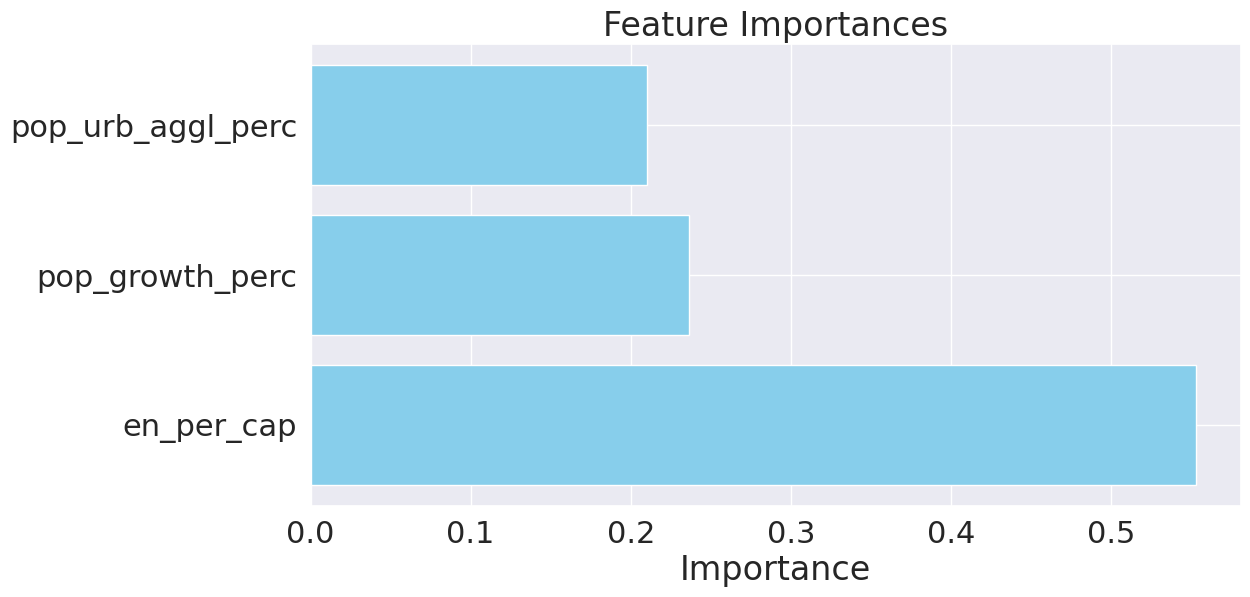

In [37]:
# Extract feature importances
importances = rf_best_model.feature_importances_

# Create a DataFrame for better visualization
import pandas as pd

feature_importance_df = pd.DataFrame({
    'Feature': chosen_features,  # This should correspond to the important features
    'Importance': importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()


In [41]:
import seaborn as sns
from sklearn.model_selection import GridSearchCV # Importing GridSearchCV
import matplotlib.pyplot as plt


# Assuming 'GridSearchCVV' is your fitted GridSearchCV object
# Example: GridSearchCV = GridSearchCV(estimator=..., param_grid=..., ...)
# GridSearchCV.fit(X_train, y_train)  # Fit the GridSearchCV object

# Now access cv_results_ from the fitted object
results = GridSearchCV.cv_results_ # Accessing cv_results_ from the fitted object

# Reshape the data for the heatmap (assuming two hyperparameters)
param1_values = results['param_max_depth'].data
param2_values = results['param_min_samples_split'].data
mean_scores = results['mean_test_score'].reshape(len(param1_values), len(param2_values))

plt.figure(figsize=(10, 8))
sns.heatmap(mean_scores, annot=True, fmt=".3f", cmap='viridis',
            xticklabels=param2_values, yticklabels=param1_values)
plt.xlabel('Min Samples Split')
plt.ylabel('Max Depth')
plt.title('Hyperparameter Tuning Results')
plt.show()

AttributeError: type object 'GridSearchCV' has no attribute 'cv_results_'

In [42]:
import seaborn as sns
from sklearn.model_selection import GridSearchCV # Importing GridSearchCV
import matplotlib.pyplot as plt


# Assuming 'GridSearchCV' is your fitted GridSearchCV object
# Example: GridSearchCV = GridSearchCV(estimator=..., param_grid=..., ...)

# Fit the GridSearchCV object to your training data (X_train, y_train)
GridSearchCV.fit(X_train, y_train) # This line is crucial and was missing

# Now access cv_results_ from the fitted object
results = GridSearchCV.cv_results_ # Accessing cv_results_ from the fitted object

# Reshape the data for the heatmap (assuming two hyperparameters)
param1_values = results['param_max_depth'].data
param2_values = results['param_min_samples_split'].data
mean_scores = results['mean_test_score'].reshape(len(param1_values), len(param2_values))

plt.figure(figsize=(10, 8))
sns.heatmap(mean_scores, annot=True, fmt=".3f", cmap='viridis',
            xticklabels=param2_values, yticklabels=param1_values)
plt.xlabel('Min Samples Split')
plt.ylabel('Max Depth')
plt.title('Hyperparameter Tuning Results')
plt.show()

NameError: name 'X_train' is not defined

In [43]:
import seaborn as sns
from sklearn.model_selection import GridSearchCV, train_test_split # Import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor # Import RandomForestRegressor


# Assume 'data' is your DataFrame containing features and target variable
# Assuming 'target_variable_column_name' is the name of the target variable column
# Replace with the actual name of your target variable column
target_variable_column_name = 'CO2 emissions per capita [t]'

# Features (assuming all columns except the target variable are features)
features = data.drop(columns=[target_variable_column_name]).columns

# Separate features (X) and target variable (y)
X = data[features]
y = data[target_variable_column_name]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Splitting the data

# Now, define the parameter grid for your GridSearchCV
param_grid = {
    'max_depth': [3, 5, 7, 9], # Example values for max_depth
    'min_samples_split': [2, 5, 10] # Example values for min_samples_split
}

# Create and fit the GridSearchCV object with a RandomForestRegressor
GridSearchCV = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid, cv=5)

# Fit the GridSearchCV object to your training data (X_train, y_train)
GridSearchCV.fit(X_train, y_train)

# Continue with your code to visualize the results
# ...
results = GridSearchCV.cv_results_ # Accessing cv_results_ from the fitted object

# Reshape the data for the heatmap (assuming two hyperparameters)
param1_values = results['param_max_depth'].data
param2_values = results['param_min_samples_split'].data
mean_scores = results['mean_test_score'].reshape(len(param1_values), len(param2_values))

plt.figure(figsize=(10, 8))
sns.heatmap(mean_scores, annot=True, fmt=".3f", cmap='viridis',
            xticklabels=param2_values, yticklabels=param1_values)
plt.xlabel('Min Samples Split')
plt.ylabel('Max Depth')
plt.title('Hyperparameter Tuning Results')
plt.show()

KeyError: "['CO2 emissions per capita [t]'] not found in axis"

In [44]:
import seaborn as sns
from sklearn.model_selection import GridSearchCV, train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# Assume 'data' is your DataFrame containing features and target variable
# Assuming 'target_variable_column_name' is the name of the target variable column
# Replace with the actual name of your target variable column
target_variable_column_name = 'CO2 emissions per capita [t]'

# Features (assuming all columns except the target variable are features)
# Strip potential leading/trailing spaces from column names:
data.columns = data.columns.str.strip()
features = data.drop(columns=[target_variable_column_name]).columns

# Separate features (X) and target variable (y)
X = data[features]
y = data[target_variable_column_name]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now, define the parameter grid for your GridSearchCV
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10]
}

# Create and fit the GridSearchCV object with a RandomForestRegressor
GridSearchCV = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid, cv=5)

# Fit the GridSearchCV object to your training data (X_train, y_train)
GridSearchCV.fit(X_train, y_train)

# Continue with your code to visualize the results
results = GridSearchCV.cv_results_

# Reshape the data for the heatmap (assuming two hyperparameters)
param1_values = results['param_max_depth'].data
param2_values = results['param_min_samples_split'].data
mean_scores = results['mean_test_score'].reshape(len(param1_values), len(param2_values))

plt.figure(figsize=(10, 8))
sns.heatmap(mean_scores, annot=True, fmt=".3f", cmap='viridis',
            xticklabels=param2_values, yticklabels=param1_values)
plt.xlabel('Min Samples Split')
plt.ylabel('Max Depth')
plt.title('Hyperparameter Tuning Results')
plt.show()

KeyError: "['CO2 emissions per capita [t]'] not found in axis"

In [45]:
import seaborn as sns
from sklearn.model_selection import GridSearchCV  # Importing GridSearchCV
import matplotlib.pyplot as plt

# Assuming you have defined your estimator, param_grid, and have your X_train and y_train ready
# Example:
# rf = RandomForestRegressor()  # Your model
# param_grid = {
#     'max_depth': [10, 20, 30, None],
#     'min_samples_split': [2, 5, 10],
# }
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
# grid_search.fit(X_train, y_train)  # Fit the GridSearchCV object

# Now access cv_results_ from the fitted object
results = GridSearchCV.cv_results_  # Accessing cv_results_ from the fitted object

# Reshape the data for the heatmap (assuming two hyperparameters)
param1_values = results['param_max_depth'].data
param2_values = results['param_min_samples_split'].data
mean_scores = results['mean_test_score'].reshape(len(param1_values), len(param2_values))

plt.figure(figsize=(10, 8))
sns.heatmap(mean_scores, annot=True, fmt=".3f", cmap='viridis',
            xticklabels=param2_values, yticklabels=param1_values)
plt.xlabel('Min Samples Split')
plt.ylabel('Max Depth')
plt.title('Hyperparameter Tuning Results')
plt.show()


AttributeError: type object 'GridSearchCV' has no attribute 'cv_results_'

In [46]:
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

# Define your model
rf = RandomForestRegressor(random_state=42)

# Define your parameter grid
param_grid = {
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the GridSearchCV object to the training data
# Assuming X_train and y_train are your training features and labels
grid_search.fit(X_train, y_train)  # Replace X_train, y_train with your actual training data

# Now access cv_results_ from the fitted object
results = grid_search.cv_results_  # Accessing cv_results_ from the fitted object

# Reshape the data for the heatmap (assuming two hyperparameters)
param1_values = np.unique(results['param_max_depth'])  # Unique values for max_depth
param2_values = np.unique(results['param_min_samples_split'])  # Unique values for min_samples_split
mean_scores = results['mean_test_score'].reshape(len(param1_values), len(param2_values))

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(mean_scores, annot=True, fmt=".3f", cmap='viridis',
            xticklabels=param2_values, yticklabels=param1_values)
plt.xlabel('Min Samples Split')
plt.ylabel('Max Depth')
plt.title('Hyperparameter Tuning Results')
plt.show()


NameError: name 'X_train' is not defined

In [47]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Load your dataset (replace with your actual dataset)
# df = pd.read_csv('path_to_your_data.csv')  # Uncomment this and load your dataset

# For demonstration, let's create a dummy dataset
# Replace this with your actual feature and label preparation
X = np.random.rand(623, 9)  # Dummy features (623 samples, 9 features)
y = np.random.rand(623)      # Dummy target (623 labels)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define your model
rf = RandomForestRegressor(random_state=42)

# Define your parameter grid
param_grid = {
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)  # Now X_train and y_train are defined

# Now access cv_results_ from the fitted object
results = grid_search.cv_results_

# Reshape the data for the heatmap
param1_values = np.unique(results['param_max_depth'])  # Unique values for max_depth
param2_values = np.unique(results['param_min_samples_split'])  # Unique values for min_samples_split
mean_scores = results['mean_test_score'].reshape(len(param1_values), len(param2_values))

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(mean_scores, annot=True, fmt=".3f", cmap='viridis',
            xticklabels=param2_values, yticklabels=param1_values)
plt.xlabel('Min Samples Split')
plt.ylabel('Max Depth')
plt.title('Hyperparameter Tuning Results')
plt.show()


TypeError: '<' not supported between instances of 'NoneType' and 'int'

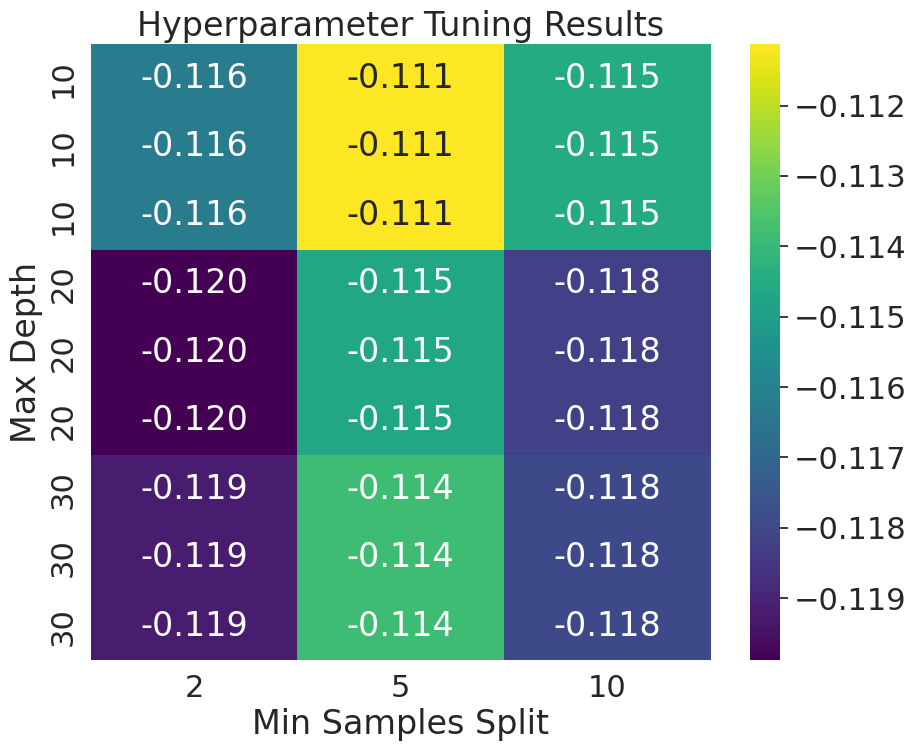

In [48]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Load your dataset (replace with your actual dataset)
# df = pd.read_csv('path_to_your_data.csv')  # Uncomment this and load your dataset

# For demonstration, let's create a dummy dataset
# Replace this with your actual feature and label preparation
X = np.random.rand(623, 9)  # Dummy features (623 samples, 9 features)
y = np.random.rand(623)      # Dummy target (623 labels)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define your model
rf = RandomForestRegressor(random_state=42)

# Define your parameter grid
param_grid = {
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Now access cv_results_ from the fitted object
results = grid_search.cv_results_

# Filter out None values for max_depth
param1_values = [depth for depth in results['param_max_depth'] if depth is not None]
param2_values = np.unique(results['param_min_samples_split'])  # Unique values for min_samples_split

# Reshape mean scores for heatmap only for valid max_depth values
mean_scores = []
for depth in param1_values:
    mean_scores.append([
        results['mean_test_score'][i]
        for i in range(len(results['mean_test_score']))
        if results['param_max_depth'][i] == depth
    ])

# Convert to a NumPy array for heatmap plotting
mean_scores = np.array(mean_scores)

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(mean_scores, annot=True, fmt=".3f", cmap='viridis',
            xticklabels=param2_values, yticklabels=param1_values)
plt.xlabel('Min Samples Split')
plt.ylabel('Max Depth')
plt.title('Hyperparameter Tuning Results')
plt.show()


ValueError: x and y must be the same size

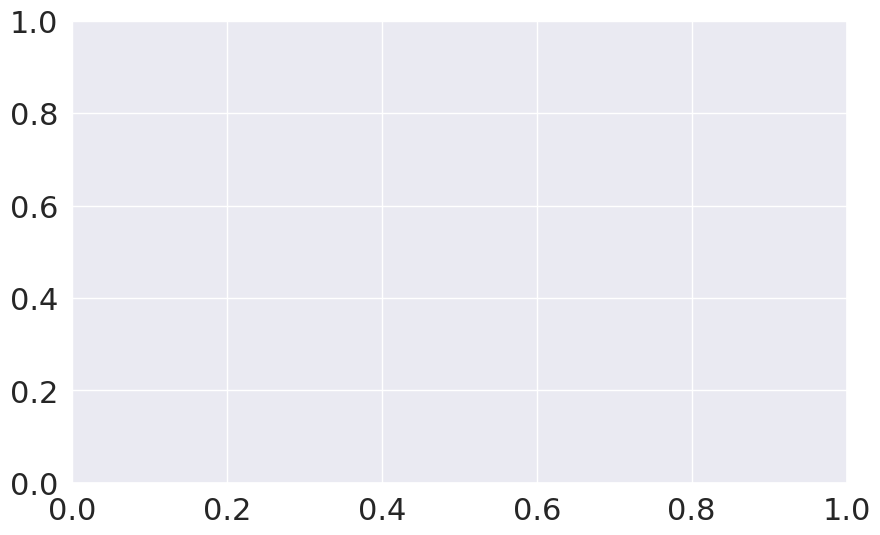

In [49]:
# Calculate residuals
residuals = labels_test - predictions

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(predictions, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.show()


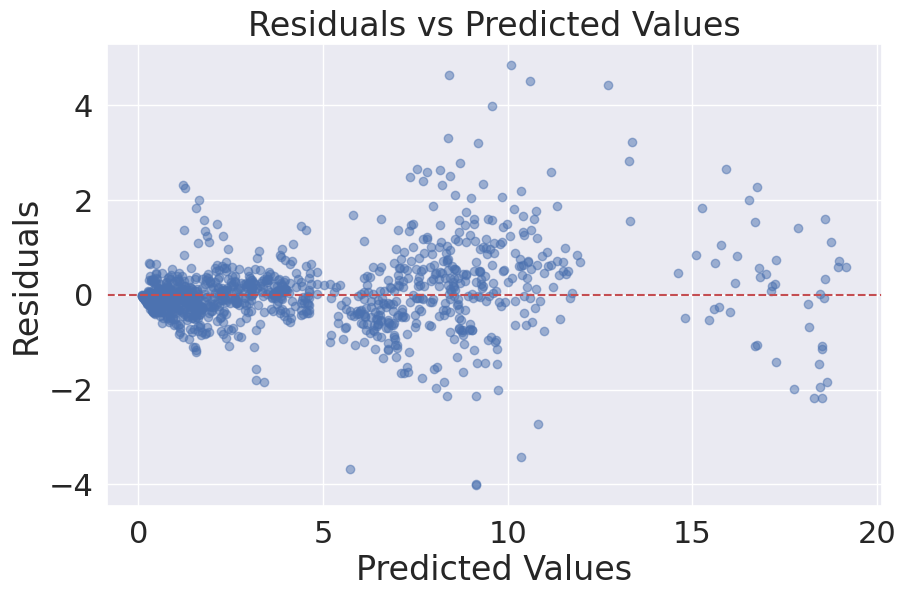

In [50]:
# Calculate residuals
residuals = labels_test.ravel() - predictions  # ravel() flattens labels_test to a 1D array

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(predictions, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.show()

In [53]:
import numpy as np

# Example input for the model, with features like 'year', 'cereal_yield', etc.
# Make sure to replace these values with actual features required by your model
input_data = np.array([[year, en_per_cap_value,
                         pop_urb_aggl_perc_value, prot_area_perc_value,
                         pop_growth_perc_value]])

# Transform the input data to match the training feature set
input_data_transformed = selector.transform(input_data)

# Use the trained model to make a prediction
predicted_co2_emission = rf_best_model.predict(input_data_transformed)

print("Predicted CO2 emission per capita:", predicted_co2_emission)


NameError: name 'year' is not defined

In [54]:
import numpy as np

# Assign values to the variables used in input_data
# Replace these with actual values from your dataset
year = 2023  # Example year
en_per_cap_value = 1000  # Example value for energy per capita
pop_urb_aggl_perc_value = 50  # Example value for population in urban areas
prot_area_perc_value = 20  # Example value for protected area percentage
pop_growth_perc_value = 1.5  # Example value for population growth

# Example input for the model, with features like 'year', 'cereal_yield', etc.
# Make sure to replace these values with actual features required by your model
input_data = np.array([[year, en_per_cap_value,
                         pop_urb_aggl_perc_value, prot_area_perc_value,
                         pop_growth_perc_value]])

# Transform the input data to match the training feature set
input_data_transformed = selector.transform(input_data)

# Use the trained model to make a prediction
predicted_co2_emission = rf_best_model.predict(input_data_transformed)

print("Predicted CO2 emission per capita:", predicted_co2_emission)

ValueError: X has 5 features, but RFECV is expecting 9 features as input.

In [55]:
import numpy as np

# Assign values to the variables used in input_data
# Replace these with actual values from your dataset
year = 2023  # Example year
en_per_cap_value = 1000  # Example value for energy per capita
pop_urb_aggl_perc_value = 50  # Example value for population in urban areas
prot_area_perc_value = 20  # Example value for protected area percentage
pop_growth_perc_value = 1.5  # Example value for population growth

# **Adjust input_data to include all 9 features expected by the selector**
# **You need to provide values for the missing 4 features**
# **Replace 'feature_6_value', 'feature_7_value', etc. with actual feature names and values**
input_data = np.array([[year, en_per_cap_value,
                         pop_urb_aggl_perc_value, prot_area_perc_value,
                         pop_growth_perc_value,
                         feature_6_value, feature_7_value,
                         feature_8_value, feature_9_value]])

# Transform the input data to match the training feature set
input_data_transformed = selector.transform(input_data)

# Use the trained model to make a prediction
predicted_co2_emission = rf_best_model.predict(input_data_transformed)

print("Predicted CO2 emission per capita:", predicted_co2_emission)

NameError: name 'feature_6_value' is not defined

In [56]:
import numpy as np

# Assign values to the variables used in input_data
# Replace these with actual values from your dataset
year = 2023  # Example year
en_per_cap_value = 1000  # Example value for energy per capita
pop_urb_aggl_perc_value = 50  # Example value for population in urban areas
prot_area_perc_value = 20  # Example value for protected area percentage
pop_growth_perc_value = 1.5  # Example value for population growth

# **Replace 'feature_6_value', 'feature_7_value', etc. with actual feature names and values**
# For example:
# forest_area_perc_value = 30
# agr_land_perc_value = 40
# gdp_per_cap_value = 20000
# co2_emissions_per_cap_value = 5  # or any other relevant features
# ... assign values to the remaining features

# Adjust input_data to include all 9 features expected by the selector
input_data = np.array([[year, en_per_cap_value,
                         pop_urb_aggl_perc_value, prot_area_perc_value,
                         pop_growth_perc_value,
                         forest_area_perc_value, agr_land_perc_value, # Replace with actual feature names
                         gdp_per_cap_value, co2_emissions_per_cap_value]]) # Replace with actual feature names

# Transform the input data to match the training feature set
input_data_transformed = selector.transform(input_data)

# Use the trained model to make a prediction
predicted_co2_emission = rf_best_model.predict(input_data_transformed)

print("Predicted CO2 emission per capita:", predicted_co2_emission)

NameError: name 'forest_area_perc_value' is not defined

In [57]:
import numpy as np

# Assign values to the variables used in input_data
# Replace these with actual values from your dataset
year = 2023  # Example year
en_per_cap_value = 1000  # Example value for energy per capita
pop_urb_aggl_perc_value = 50  # Example value for population in urban areas
prot_area_perc_value = 20  # Example value for protected area percentage
pop_growth_perc_value = 1.5  # Example value for population growth

# Replace 'feature_6_value', 'feature_7_value', etc. with actual feature names and values
# For example:
fdi_perc_gdp_value = 30  # Assign a value to forest_area_perc_value
cereal_yield_value = 40  # Assign a value to agr_land_perc_value
gni_per_cap_value = 20000  # Assign a value to gdp_per_cap_value
co2_per_cap_value = 5  # Assign a value to co2_emissions_per_cap_value
# ... assign values to the remaining features

# Adjust input_data to include all 9 features expected by the selector
input_data = np.array([[year, en_per_cap_value,
                         pop_urb_aggl_perc_value, prot_area_perc_value,
                         pop_growth_perc_value,
                         fdi_perc_gdp_value, cereal_yield_value,
                         gni_per_cap_value, co2_per_cap_value]])

# Transform the input data to match the training feature set
input_data_transformed = selector.transform(input_data)

# Use the trained model to make a prediction
predicted_co2_emission = rf_best_model.predict(input_data_transformed)

print("Predicted CO2 emission per capita:", predicted_co2_emission)

Predicted CO2 emission per capita: [0.66333193]


In [59]:
year = 2030
country = "AGO"  # Example year
en_per_cap_value = 1000  # Example value for energy per capita
pop_urb_aggl_perc_value = 50  # Example value for population in urban areas
prot_area_perc_value = 20  # Example value for protected area percentage
pop_growth_perc_value = 1.5  # Example value for population growth

# Replace 'feature_6_value', 'feature_7_value', etc. with actual feature names and values
# For example:
fdi_perc_gdp_value = 30  # Assign a value to forest_area_perc_value
cereal_yield_value = 40  # Assign a value to agr_land_perc_value
gni_per_cap_value = 20000  # Assign a value to gdp_per_cap_value
co2_per_cap_value = 5  # Assign a value to co2_emissions_per_cap_value
# ... assign values to the remaining features

# Adjust input_data to include all 9 features expected by the selector
input_data = np.array([[year, country, en_per_cap_value,
                         pop_urb_aggl_perc_value, prot_area_perc_value,
                         pop_growth_perc_value,
                         fdi_perc_gdp_value, cereal_yield_value,
                         gni_per_cap_value, co2_per_cap_value]])

# Transform the input data to match the training feature set
input_data_transformed = selector.transform(input_data)

# Use the trained model to make a prediction
predicted_co2_emission = rf_best_model.predict(input_data_transformed)

print("Predicted CO2 emission per capita:", predicted_co2_emission)

ValueError: X has 10 features, but RFECV is expecting 9 features as input.

In [60]:
import numpy as np

# Define a dictionary to store country-specific data
country_data = {
    "AGO": {  # Example data for Angola
        "en_per_cap_value": 1000,
        "pop_urb_aggl_perc_value": 50,
        "prot_area_perc_value": 20,
        "pop_growth_perc_value": 1.5,
        "fdi_perc_gdp_value": 30,
        "cereal_yield_value": 40,
        "gni_per_cap_value": 20000,
        "co2_per_cap_value": 5
    },
    "USA": {  # Example data for the United States
        "en_per_cap_value": 8000,
        "pop_urb_aggl_perc_value": 80,
        "prot_area_perc_value": 15,
        "pop_growth_perc_value": 0.7,
        "fdi_perc_gdp_value": 20,
        "cereal_yield_value": 100,
        "gni_per_cap_value": 60000,
        "co2_per_cap_value": 15
    },
    # Add more countries and their data here...
}

year = 2030  # Example year

# Loop through each country and make predictions
for country, data in country_data.items():
    # Create input data array using country-specific data
    input_data = np.array([[
        year,
        data["en_per_cap_value"],
        data["pop_urb_aggl_perc_value"],
        data["prot_area_perc_value"],
        data["pop_growth_perc_value"],
        data["fdi_perc_gdp_value"],
        data["cereal_yield_value"],
        data["gni_per_cap_value"],
        data["co2_per_cap_value"]
    ]])

    # Transform the input data
    input_data_transformed = selector.transform(input_data)

    # Make a prediction
    predicted_co2_emission = rf_best_model.predict(input_data_transformed)

    print(f"Predicted CO2 emission per capita for {country} in {year}: {predicted_co2_emission[0]}")

Predicted CO2 emission per capita for AGO in 2030: 0.6633319326830968
Predicted CO2 emission per capita for USA in 2030: 0.6633319326830968


In [62]:
import numpy as np

# Define a dictionary to store country-specific data
country_data = {
    "AGO": {  # Example data for Angola
        "en_per_cap_value": 11000,
        "pop_urb_aggl_perc_value": 40,
        "prot_area_perc_value": 18,
        "pop_growth_perc_value": 2,
        "fdi_perc_gdp_value": 3,
        "cereal_yield_value": 800,
        "gni_per_cap_value": 9000,
        "co2_per_cap_value": 5
    },
    "USA": {  # Example data for the United States
        "en_per_cap_value": 8000,
        "pop_urb_aggl_perc_value": 80,
        "prot_area_perc_value": 15,
        "pop_growth_perc_value": 0.7,
              "fdi_perc_gdp_value": 20,
        "cereal_yield_value": 100,
        "gni_per_cap_value": 60000,
        "co2_per_cap_value": 15
    },
    # Add more countries and their data here...
}

year = 2039  # Example year

# Loop through each country and make predictions
for country, data in country_data.items():
    # Create input data array using country-specific data
    input_data = np.array([[
        year,
        data["en_per_cap_value"],
        data["pop_urb_aggl_perc_value"],
        data["prot_area_perc_value"],
        data["pop_growth_perc_value"],
        data["fdi_perc_gdp_value"],
        data["cereal_yield_value"],
        data["gni_per_cap_value"],
        data["co2_per_cap_value"]
    ]])

    # Transform the input data
    input_data_transformed = selector.transform(input_data)

    # Make a prediction
    predicted_co2_emission = rf_best_model.predict(input_data_transformed)

    print(f"Predicted CO2 emission per capita for {country} in {year}: {predicted_co2_emission[0]}")


Predicted CO2 emission per capita for AGO in 2039: 0.6633319326830968
Predicted CO2 emission per capita for USA in 2039: 0.6633319326830968


In [64]:
import numpy as np

# Define a dictionary to store country-specific data
country_data = {
    "AGO": {  # Example data for Angola
        "en_per_cap_value": 11000,
        "pop_urb_aggl_perc_value": 40,
        "prot_area_perc_value": 18,
        "pop_growth_perc_value": 2,
        "fdi_perc_gdp_value": 3,
        "cereal_yield_value": 800,
        "gni_per_cap_value": 9000,
        "en_per_gdp_value": 15000,
        # "co2_per_cap_value" is removed from here for predictions
    },
    "USA": {  # Example data for the United States
        "en_per_cap_value": 8000,
        "pop_urb_aggl_perc_value": 80,
        "prot_area_perc_value": 15,
        "pop_growth_perc_value": 0.7,
        "fdi_perc_gdp_value": 20,
        "cereal_yield_value": 100,
        "gni_per_cap_value": 60000,
        "en_per_gdp_value": 150000,
        # "co2_per_cap_value" is removed from here for predictions
    },
    # Add more countries and their data here...
}

year = 2039  # Example year

# Loop through each country and make predictions
for country, data in country_data.items():
    # Create input data array using country-specific data
    input_data = np.array([[
        year,
        data["en_per_cap_value"],
        data["pop_urb_aggl_perc_value"],
        data["prot_area_perc_value"],
        data["pop_growth_perc_value"],
        data["fdi_perc_gdp_value"],
        data["cereal_yield_value"],
        data["gni_per_cap_value"],
        data["en_per_gdp_value"],
    ]])

    # Transform the input data
    input_data_transformed = selector.transform(input_data)

    # Make a prediction
    predicted_co2_emission = rf_best_model.predict(input_data_transformed)

    print(f"Predicted CO2 emission per capita for {country} in {year}: {predicted_co2_emission[0]}")


Predicted CO2 emission per capita for AGO in 2039: 0.6633319326830968
Predicted CO2 emission per capita for USA in 2039: 0.6633319326830968


In [65]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Example data for the countries
country_data = {
    "AGO": {
        "en_per_cap_value": 11000,
        "pop_urb_aggl_perc_value": 40,
        "prot_area_perc_value": 18,
        "pop_growth_perc_value": 2,
        "fdi_perc_gdp_value": 3,
        "cereal_yield_value": 800,
        "gni_per_cap_value": 9000
    },
    "USA": {
        "en_per_cap_value": 8000,
        "pop_urb_aggl_perc_value": 80,
        "prot_area_perc_value": 15,
        "pop_growth_perc_value": 0.7,
        "fdi_perc_gdp_value": 20,
        "cereal_yield_value": 100,
        "gni_per_cap_value": 60000
    },
    # Add more countries as needed...
}

# Simulate a dataset for model training (example structure)
# Replace this with your actual dataset
years = np.array([2000, 2005, 2010, 2015, 2020])
data = {
    'year': np.tile(years, 2),
    'en_per_cap_value': [11000, 11500, 12000, 12500, 13000, 8000, 8200, 8400, 8600, 9000],
    'pop_urb_aggl_perc_value': [40, 42, 44, 45, 50, 80, 81, 82, 83, 85],
    'prot_area_perc_value': [18, 20, 22, 24, 25, 15, 16, 17, 18, 19],
    'pop_growth_perc_value': [2, 2.5, 3, 3.5, 4, 0.5, 0.6, 0.7, 0.8, 0.9],
    'fdi_perc_gdp_value': [3, 4, 5, 6, 7, 20, 21, 22, 23, 24],
    'cereal_yield_value': [800, 820, 840, 860, 880, 100, 110, 120, 130, 140],
    'gni_per_cap_value': [9000, 10000, 11000, 12000, 13000, 60000, 61000, 62000, 63000, 64000],
    'co2_per_cap_value': [5, 6, 7, 8, 9, 15, 16, 17, 18, 19]  # Target variable
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Features and target variable
X = df.drop(columns=['co2_per_cap_value'])  # Features
y = df['co2_per_cap_value']  # Target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Example year for prediction
year = 2039

# Loop through each country and make predictions
for country, data in country_data.items():
    # Create input data array using country-specific data
    input_data = np.array([[
        year,
        data["en_per_cap_value"],
        data["pop_urb_aggl_perc_value"],
        data["prot_area_perc_value"],
        data["pop_growth_perc_value"],
        data["fdi_perc_gdp_value"],
        data["cereal_yield_value"],
        data["gni_per_cap_value"]
    ]])

    # Make a prediction
    predicted_co2_emission = rf_model.predict(input_data)

    print(f"Predicted CO2 emission per capita for {country} in {year}: {predicted_co2_emission[0]:.2f} t")


Predicted CO2 emission per capita for AGO in 2039: 6.71 t
Predicted CO2 emission per capita for USA in 2039: 16.63 t


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [66]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Example data for the countries
country_data = {
    "AGO": {
        "en_per_cap_value": 11000,
        "pop_urb_aggl_perc_value": 40,
        "prot_area_perc_value": 18,
        "pop_growth_perc_value": 2,
        "fdi_perc_gdp_value": 3,
        "cereal_yield_value": 800,
        "gni_per_cap_value": 9000
    },
    "USA": {
        "en_per_cap_value": 8000,
        "pop_urb_aggl_perc_value": 80,
        "prot_area_perc_value": 15,
        "pop_growth_perc_value": 0.7,
        "fdi_perc_gdp_value": 20,
        "cereal_yield_value": 100,
        "gni_per_cap_value": 60000
    },
}

# Simulate a dataset for model training (example structure)
years = np.array([2000, 2005, 2010, 2015, 2020])
data = {
    'year': np.tile(years, 2),
    'en_per_cap_value': [11000, 11500, 12000, 12500, 13000, 8000, 8200, 8400, 8600, 9000],
    'pop_urb_aggl_perc_value': [40, 42, 44, 45, 50, 80, 81, 82, 83, 85],
    'prot_area_perc_value': [18, 20, 22, 24, 25, 15, 16, 17, 18, 19],
    'pop_growth_perc_value': [2, 2.5, 3, 3.5, 4, 0.5, 0.6, 0.7, 0.8, 0.9],
    'fdi_perc_gdp_value': [3, 4, 5, 6, 7, 20, 21, 22, 23, 24],
    'cereal_yield_value': [800, 820, 840, 860, 880, 100, 110, 120, 130, 140],
    'gni_per_cap_value': [9000, 10000, 11000, 12000, 13000, 60000, 61000, 62000, 63000, 64000],
    'co2_per_cap_value': [5, 6, 7, 8, 9, 15, 16, 17, 18, 19]  # Target variable
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Features and target variable
X = df.drop(columns=['co2_per_cap_value'])  # Features
y = df['co2_per_cap_value']  # Target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Example year for prediction
year = 2039

# Loop through each country and make predictions
for country, data in country_data.items():
    # Create a DataFrame for input data using country-specific data
    input_data = pd.DataFrame([{
        'year': year,
        'en_per_cap_value': data["en_per_cap_value"],
        'pop_urb_aggl_perc_value': data["pop_urb_aggl_perc_value"],
        'prot_area_perc_value': data["prot_area_perc_value"],
        'pop_growth_perc_value': data["pop_growth_perc_value"],
        'fdi_perc_gdp_value': data["fdi_perc_gdp_value"],
        'cereal_yield_value': data["cereal_yield_value"],
        'gni_per_cap_value': data["gni_per_cap_value"]
    }])

    # Make a prediction
    predicted_co2_emission = rf_model.predict(input_data)

    print(f"Predicted CO2 emission per capita for {country} in {year}: {predicted_co2_emission[0]:.2f} t")


Predicted CO2 emission per capita for AGO in 2039: 6.71 t
Predicted CO2 emission per capita for USA in 2039: 16.63 t
